# Web Scraping

To gather our review data to understand great whiskeys, we will scrape Whisky Advocate's over 4,00 reviews. We will use python to access the reviews on the web and extract the relevant information from directly from the site's html.

https://www.whiskyadvocate.com/

In [45]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# make a list of score ranges
score_range = ['95-100', '90-94', '80-89', '70-79', '60-69']

In [9]:
url = f"http://whiskyadvocate.com/ratings-reviews/?search=&submit=&brand_id=0&rating={score}&price=0&category=0&styles_id=0&issue_id=0"

In [ ]:
# build a list of urls using a for-loop
urls = []
for score in score_range:
    urls.append(f"http://whiskyadvocate.com/ratings-reviews/?search=&submit=&brand_id=0&rating={score}&price=0&category=0&styles_id=0&issue_id=0")

In [12]:
# build a list of urls using list comprehension
urls = [url for score in score_range]
urls

['http://whiskyadvocate.com/ratings-reviews/?search=&submit=&brand_id=0&rating=60-69&price=0&category=0&styles_id=0&issue_id=0',
 'http://whiskyadvocate.com/ratings-reviews/?search=&submit=&brand_id=0&rating=60-69&price=0&category=0&styles_id=0&issue_id=0',
 'http://whiskyadvocate.com/ratings-reviews/?search=&submit=&brand_id=0&rating=60-69&price=0&category=0&styles_id=0&issue_id=0',
 'http://whiskyadvocate.com/ratings-reviews/?search=&submit=&brand_id=0&rating=60-69&price=0&category=0&styles_id=0&issue_id=0',
 'http://whiskyadvocate.com/ratings-reviews/?search=&submit=&brand_id=0&rating=60-69&price=0&category=0&styles_id=0&issue_id=0']

In [16]:
# make a list of tags
tags = ['ratingValue', 'name', 'category', 'priceCurrency', 
 'price', 'description', 'author']

In [17]:
def get_review(review):
    data = {}
    for t in tags:
        data[t] = review.find(itemprop=t).text
    return data

In [18]:
def whiskey(urls):
    
    whiskey_reviews = list()
    
    for u in urls:
        r = requests.get(u)
        
        soup = BeautifulSoup(r.text, "lxml")
        ratings = soup.find(class_="ratings-grid-holder")
        
        ratings = ratings.find_all("article")
        
        reviews = [get_review(r) for r in ratings]
        
        whiskey_reviews += reviews
    
    return whiskey_reviews

In [19]:
data = whiskey(urls)

In [24]:
print(len(data))

55


In [25]:
data[0]

{'ratingValue': '69',
 'name': 'Cabin Fever, 40%',
 'category': 'Flavored Whisky & Liqueurs',
 'priceCurrency': '$',
 'price': '21',
 'description': '\nReal maple syrup has an earthy, woodsy aroma; maple flavoring has strong overtones of coconut, and so does Cabin Fever. The nose evokes dried, sweetened baking coconut, while the sweet and spicy palate is a hot, liquid, coconut macaroon. Peppery notes suggest that it’s whisky, but without any traces of barrel aging that’s as close as you get. Best part? The long, spicy finish with its confection-sweet coconut.',
 'author': 'Davin de Kergommeaux'}

In [27]:
data[0].keys()

dict_keys(['ratingValue', 'name', 'category', 'priceCurrency', 'price', 'description', 'author'])

In [28]:
data[0]['description']

'\nReal maple syrup has an earthy, woodsy aroma; maple flavoring has strong overtones of coconut, and so does Cabin Fever. The nose evokes dried, sweetened baking coconut, while the sweet and spicy palate is a hot, liquid, coconut macaroon. Peppery notes suggest that it’s whisky, but without any traces of barrel aging that’s as close as you get. Best part? The long, spicy finish with its confection-sweet coconut.'

## Data Exploration

In [32]:
df = pd.DataFrame.from_records(data)
df.shape

(55, 7)

In [33]:
df.head(2)

,ratingValue,name,category,priceCurrency,price,description,author
0,69,"Cabin Fever, 40%",Flavored Whisky & Liqueurs,$,21,"\nReal maple syrup has an earthy, woodsy aroma...",Davin de Kergommeaux
1,69,"Rogue Dead Guy American Whiskey, 40%",American Whiskey,$,40,"\nI love Rogue beers, as well as Rogue’s attit...",John Hansell


In [34]:
df['ratingValue'].astype('int').describe()

count    55.000000
mean     65.545455
std       3.172907
min      60.000000
25%      63.000000
50%      67.000000
75%      68.000000
max      69.000000
Name: ratingValue, dtype: float64

In [35]:
df['category'].value_counts()

Flavored Whisky & Liqueurs    25
American Whiskey               5
Canadian                       5
White Whiskey                  5
Single Malt Scotch             5
Blended American Whiskey       5
Bourbon/Tennessee              5
Name: category, dtype: int64

In [36]:
df['p2'] = df['price'].astype('str').replace(",","").replace("$", "")

In [37]:
df['p2'].astype('float').describe()

count    55.000000
mean     29.818182
std      14.284271
min      16.000000
25%      17.000000
50%      22.000000
75%      40.000000
max      60.000000
Name: p2, dtype: float64

In [39]:
df['p2'].str.replace("$", "").str.replace("/set","").astype('float')
df['p2'].head()

/var/folders/2l/f34xc_012glb01q2tq40qxgw0000gn/T/ipykernel_59365/714083441.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['p2'].str.replace("$", "").str.replace("/set","").astype('float')


0    21
1    40
2    20
3    16
4    22
Name: p2, dtype: object

In [40]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

<AxesSubplot:xlabel='ratingValue', ylabel='price'>

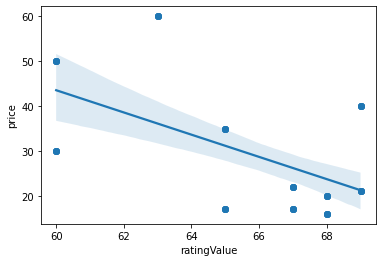

In [41]:
import seaborn as sns

sns.regplot(x=df[df['price'] < 20000]['ratingValue'].astype('float'), y=df[df['price'] < 20000]['price'])

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pert_alcohol', ylabel='Density'>

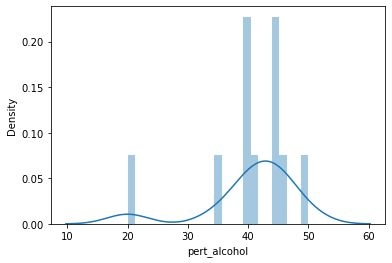

In [49]:
def  is_it_perct(name):
    #print(name)
    last_seg = name.split()[-1]
    if last_seg[-1:] == "%":
        return last_seg[:-1]
    else:
        return None
df['pert_alcohol'] = df['name'].apply(is_it_perct)
df['pert_alcohol'] = pd.to_numeric(df['pert_alcohol'], errors='coerce')

sns.distplot(df[-df['pert_alcohol'].isnull()]['pert_alcohol'], bins=25)

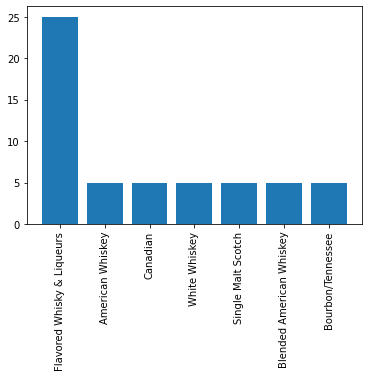

In [46]:
types = df['category'].value_counts()[:9]

height = types.tolist()
bars = types.index.tolist()
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars, rotation='vertical')

plt.show()